In [17]:
#Importing required libraries 
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [18]:
#Loading the Required Data set 
magazine = pd.read_excel('/Users/sameekshabs/Downloads/marketing_campaign.xlsx')
magazine

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [19]:
# Removing irrelevant variables
magazine = magazine.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Dt_Customer'])

# Replacing missing values in 'Income' with the mean imputation
mean_income = magazine['Income'].mean()
magazine['Income'].fillna(mean_income, inplace=True)

# Changing data type of 'Income' to Integer
magazine['Income'] = pd.to_numeric(magazine['Income'], downcast='integer', errors='coerce')
magazine['Income'] = magazine['Income'].astype('int32')

# Converting specified columns to categorical data type
non_numeric_columns = ['Education', 'Marital_Status']
magazine[non_numeric_columns] = magazine[non_numeric_columns].astype('category')


In [20]:
magazine

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,58,635,88,...,88,3,8,10,4,7,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,38,11,1,...,6,2,1,1,2,5,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,26,426,49,...,42,1,8,2,10,4,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,26,11,4,...,5,2,2,0,4,6,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,94,173,43,...,15,5,5,3,6,5,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,46,709,43,...,247,2,9,3,4,5,0,3,11,0
2236,4001,1946,PhD,Together,64014,2,1,56,406,0,...,8,7,8,2,5,7,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981,0,0,91,908,48,...,24,1,2,3,13,6,0,3,11,0
2238,8235,1956,Master,Together,69245,0,1,8,428,30,...,61,2,6,5,10,3,0,3,11,0


/var/folders/q4/f4mdy_c93cg3vc9r_2_2rxn80000gn/T/ipykernel_15755/3508794139.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


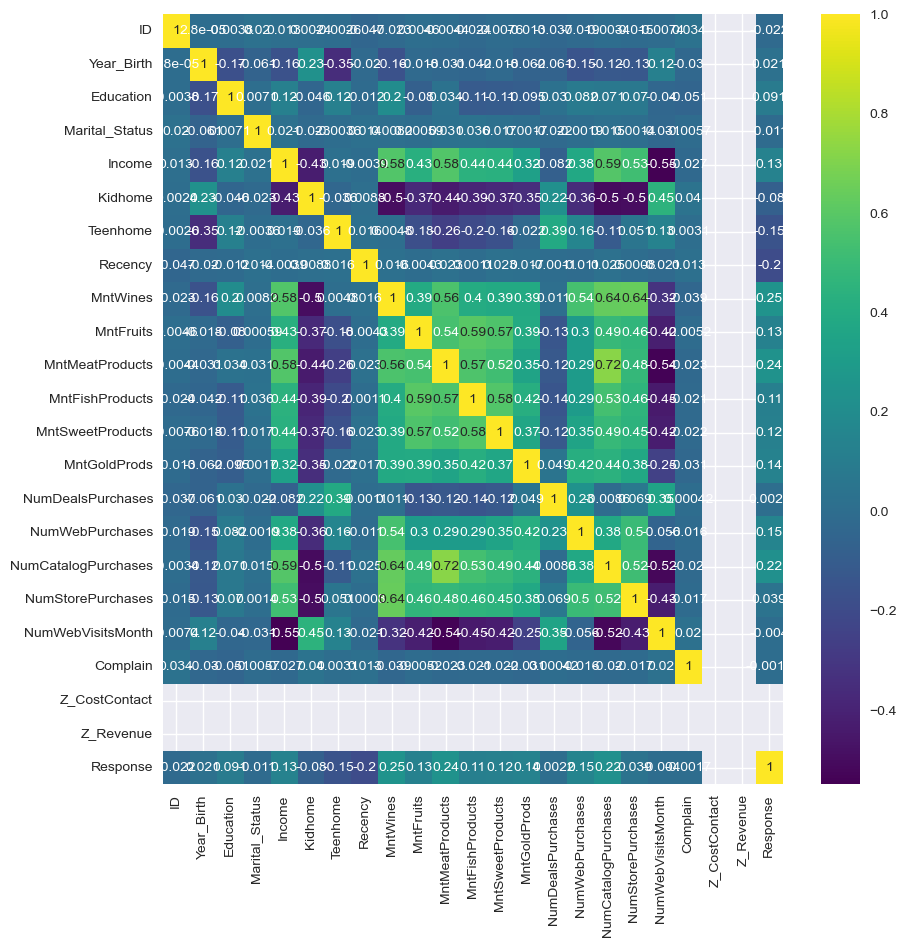

In [23]:
# Checking the linearity between variables
plt.figure(figsize=(10, 10))
plt.style.use("seaborn")

# Encode categorical variables for correlation calculation
encoded_magazine = magazine.copy()
encoded_magazine[non_numeric_columns] = encoded_magazine[non_numeric_columns].apply(lambda x: x.cat.codes)

c = encoded_magazine.corr()
sns.heatmap(c, cmap='viridis', annot=True)
plt.show()


In [47]:
# Building a Logistic Regression model

import statsmodels.api as sm

# Assuming your dataset is named 'magazine'
# Drop unnecessary columns like 'ID' and 'Response' for the predictor variables
X = magazine.drop(columns=['ID', 'Response'])

# Target variable
y = magazine['Response']

# Convert categorical variables to dummy variables using one-hot encoding
X = pd.get_dummies(X, columns=['Education', 'Marital_Status'], drop_first=True)

# Handle missing values
X.fillna(0, inplace=True)

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#statsmodels summary
X_train = sm.add_constant(X_train)
model_stats = sm.Logit(y_train.astype(float), X_train.astype(float)).fit()
print(model_stats.summary())


         Current function value: 0.304953
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1763
Method:                           MLE   Df Model:                           28
Date:                Sun, 28 Jan 2024   Pseudo R-squ.:                  0.2722
Time:                        02:35:20   Log-Likelihood:                -546.48
converged:                      False   LL-Null:                       -750.87
Covariance Type:            nonrobust   LLR p-value:                 3.180e-69
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Year_Birth                  0.0006      0.007      0.079      0.937      -0.013       0.014
Income                   6

/Users/sameekshabs/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sameekshabs/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Accuracy: 0.84375

Confusion Matrix:
 [[370   9]
 [ 61   8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       379
           1       0.47      0.12      0.19        69

    accuracy                           0.84       448
   macro avg       0.66      0.55      0.55       448
weighted avg       0.80      0.84      0.80       448


Coefficients:
                    Variable  Coefficient
0                Year_Birth    -0.000502
1                    Income    -0.000018
2                   Kidhome     0.000127
3                  Teenhome    -0.000365
4                   Recency    -0.026538
5                  MntWines     0.001801
6                 MntFruits    -0.000355
7           MntMeatProducts     0.002445
8           MntFishProducts    -0.002208
9          MntSweetProducts     0.001813
10             MntGoldProds     0.003945
11        NumDealsPurchases     0.000146
12          NumWebPurchases     0.0008

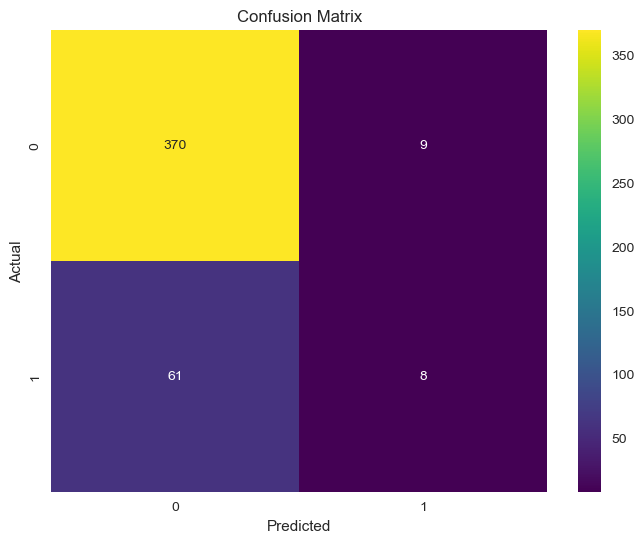

In [51]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display the coefficients for interpretation
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_[0]})
print("\nCoefficients:\n", coefficients)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [52]:
#Building an SVM Model 

#from sklearn import svm

svm_model = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [58]:
#Predict the response for test dataset
# Assuming 'y_test' is your true labels for the test set
# Predict the response for the test dataset
z_pred = svm_model.predict(X_test)

# Calculate the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, z_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cnf_matrix)



Confusion Matrix:
 [[367  12]
 [ 60   9]]


In [63]:
# Assuming 'x_test' is the feature matrix and 'y_test' is the true labels for the test set

# Calculate the accuracy
accuracy = svm_model.score(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.8392857142857143


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, z_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       379
           1       0.43      0.13      0.20        69

    accuracy                           0.84       448
   macro avg       0.64      0.55      0.56       448
weighted avg       0.79      0.84      0.80       448

